In [457]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [458]:
# Creating a synthetic dataset
X,y = make_blobs(n_samples = 500,n_features = 2,centers=5,random_state=3)

In [459]:
X.shape # Containing 2 features

(500, 2)

In [460]:
y.shape # Array consists of integer from 0 to 4

(500,)

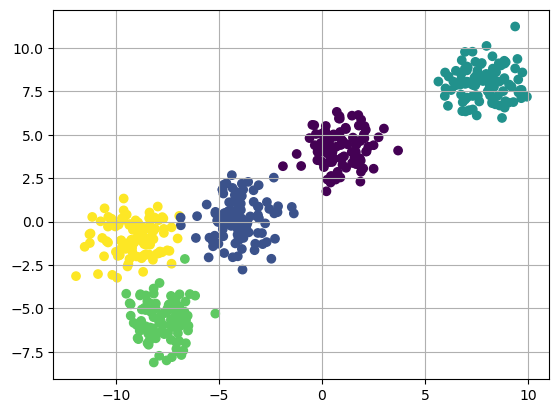

In [461]:
# Visualizing different clusters
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [462]:
# Initializing Random Centers
k = 5
colors = ['green','yellow','blue','cyan','red']

clusters = {}
for idx in range(k):
    # Return a random matrix of size (2,1) or 2
    # Gives values between -10 & 10
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    # Iterate through every cluster and generate a random center for each cluster
    # and append the cluster into clusters dictionary
    cluster = {
        'center': center,
        'points': [],
        # Denote a color for each cluster
        'color' : colors[idx]
    }
    
    clusters[idx] = cluster 

In [463]:
clusters

{0: {'center': array([ 7.44942026, -6.22684518]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.71304554,  8.20675502]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-4.4750437 , -1.15629693]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 9.97833996, -8.38187109]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-5.925126  ,  0.96013729]),
  'points': [],
  'color': 'red'}}

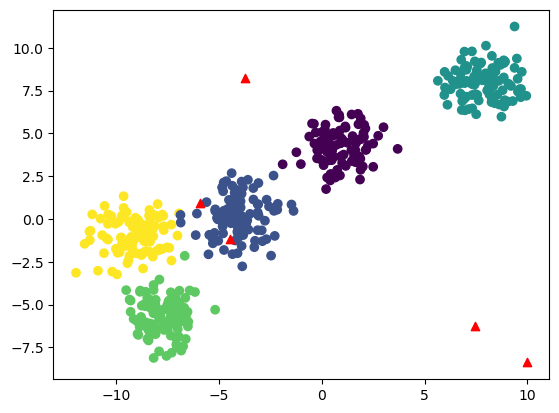

In [464]:
plt.scatter(X[:,0],X[:,1],c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()

In [465]:
# Creating a distance function
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [466]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [467]:
# Implementing E step (Assigning clusters)
# Iterate through every point in dataset calculate its distance from each cluster 
# and assign it to the nearest cluster
def assign_clusters():
    for idx in range(X.shape[0]):
        dist   = []
        # Current x point
        curr_x = X[idx]
        # Calculate distance of curr_x point from every cluster
        # k : no. of clusters
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        # Returns the index where min value is present
        curr_cluster = np.argmin(dist)
        # Update the points list with the particular cluster
        clusters[curr_cluster]['points'].append(curr_x)
        
# Implementing the M step (Updating clusters)
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            #axis=0 : Taking mean along the rows
            new_center = pts.mean(axis=0)
            # Update the cluster dict
            clusters[idx]['center'] = new_center
            # Erase previous points since Step 2&3 needs to be repeated
            clusters[idx]['points'] = []

#Plotting the assigned clusters
# Iterating through clusters dictionary
# If a particular cluster has any points assigned to it, plot those points
def plot_clusters():
    for i in clusters:
        # Returns all points that ae in a particular cluster
        # pts can be empty cause of random initialization
        pts = np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c='black',marker='^')

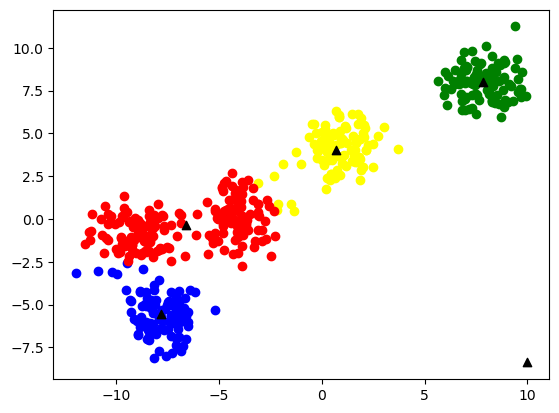

In [474]:
assign_clusters()
plot_clusters()
update_clusters()

### Scikit Learn K-Means

In [475]:
# By default K-Means++ initialization is used
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

In [476]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [477]:
# Computes the centers
km.fit(X,y)

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [478]:
# Gives cluster centers
centers = km.cluster_centers_

In [479]:
# Assigning a label randomly to each and every point
labels = km.labels_

In [480]:
print(len(labels))

500


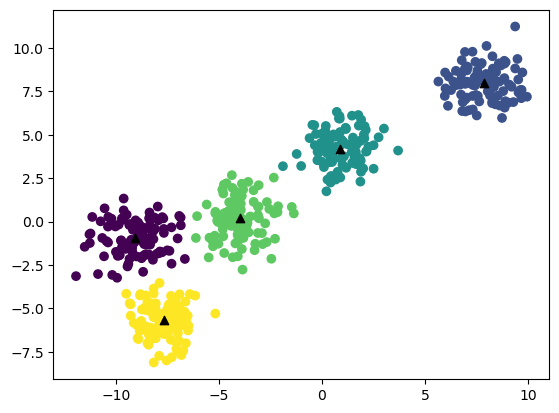

In [482]:
# Optimal Clustering
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='black',marker='^')
plt.show()